In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
%matplotlib inline 
sns.set(style="ticks")

Dataset link: https://www.kaggle.com/datasets/atharvasoundankar/fashion-retail-sales

In [82]:
df = pd.read_csv('Fashion_Retail_Sales.csv', sep=",")
df.head()

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
0,4018,Handbag,4619.0,05-02-2023,NaN,Credit Card
1,4115,Tunic,2456.0,11-07-2023,2.0,Credit Card
2,4019,Tank Top,2102.0,23-03-2023,4.1,Cash
3,4097,Leggings,3126.0,15-03-2023,3.2,Cash
4,3997,Wallet,3003.0,27-11-2022,4.7,Cash


In [83]:
total_count = df.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 3400


## 1. Обработка пропусков

In [84]:
# проверим есть ли пропущенные значения
print(df.isnull().sum())

Customer Reference ID      0
Item Purchased             0
Purchase Amount (USD)    650
Date Purchase              0
Review Rating            324
Payment Method             0
dtype: int64


In [85]:
# Заполнение пропусков в 'Purchase Amount' средним значением
if df['Purchase Amount (USD)'].isnull().any():  # Проверяем, есть ли пропуски в столбце
    mean_amount = df['Purchase Amount (USD)'].dropna().mean()  # Считаем среднее, игнорируя NaN
    df['Purchase Amount (USD)'].fillna(mean_amount, inplace=True)
    df['Purchase Amount (USD)'] = df['Purchase Amount (USD)'].astype(int) 

In [86]:
# Заполнение пропусков в 'Review Rating' медианой
if df['Review Rating'].isnull().any():  # Проверяем, есть ли пропуски в столбце
    median_rating = df['Review Rating'].dropna().median()  # Считаем медиану, игнорируя NaN
    df['Review Rating'].fillna(median_rating, inplace=True)
    print("Пропуски в 'Review Rating' заполнены медианой.")

Пропуски в 'Review Rating' заполнены медианой.


## Гистограммы

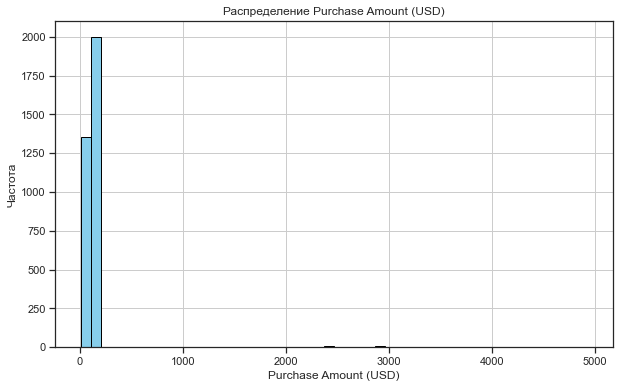

In [87]:
# 1.  Гистограмма для 'Purchase Amount (USD)'
plt.figure(figsize=(10, 6))  
plt.hist(df['Purchase Amount (USD)'], bins=50, color='skyblue', edgecolor='black') #bins - кол-во столбцов
plt.title('Распределение Purchase Amount (USD)')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Частота')
plt.grid(True)  
plt.show() 

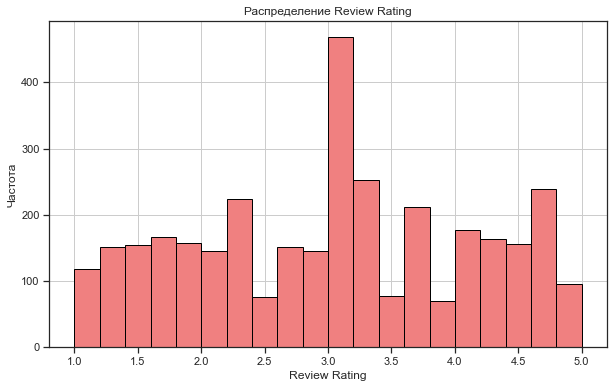

In [88]:
# 2.  Гистограмма для 'Review Rating'
plt.figure(figsize=(10, 6))
plt.hist(df['Review Rating'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Распределение Review Rating')
plt.xlabel('Review Rating')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

## 2. Преобразование категориальных признаков

In [89]:
categorical_features = df.select_dtypes(include='object').columns
print(f"\nКатегориальные признаки: {categorical_features}")


Категориальные признаки: Index(['Item Purchased', 'Date Purchase', 'Payment Method'], dtype='object')


In [90]:
# Убрали дату
categorical_features = categorical_features.drop('Date Purchase')

In [91]:
le = LabelEncoder()
# Применяем Label Encoding к столбцам 'Item Purchased' и 'Payment Method'
for col in categorical_features:
    df[col] = le.fit_transform(df[col])  # Label Encoding
    print(f"Столбец '{col}' закодирован с помощью Label Encoding.")

Столбец 'Item Purchased' закодирован с помощью Label Encoding.
Столбец 'Payment Method' закодирован с помощью Label Encoding.


### OneHotEncoder

In [95]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False) #handle_unknown='ignore' проигнорирует неизвестные значения, которые могут появиться в новых данных
                                                                   #sparse_output=False вернет NumPy array, а не sparse matrix

#    Обучим OneHotEncoder на категориальных признаках (кроме тех, что уже закодированы LabelEncoder-ом)
ohe.fit(df[categorical_features])

#    Преобразуем категориальные признаки
ohe_values = ohe.transform(df[categorical_features])

#    Создадим имена новых колонок
ohe_feature_names = ohe.get_feature_names_out(categorical_features)

#    Создадим новый DataFrame с закодированными признаками
df_ohe = pd.DataFrame(ohe_values, columns=ohe_feature_names)


In [96]:
ohe_values

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [98]:
ohe_feature_names

array(['Item Purchased_0', 'Item Purchased_1', 'Item Purchased_2',
       'Item Purchased_3', 'Item Purchased_4', 'Item Purchased_5',
       'Item Purchased_6', 'Item Purchased_7', 'Item Purchased_8',
       'Item Purchased_9', 'Item Purchased_10', 'Item Purchased_11',
       'Item Purchased_12', 'Item Purchased_13', 'Item Purchased_14',
       'Item Purchased_15', 'Item Purchased_16', 'Item Purchased_17',
       'Item Purchased_18', 'Item Purchased_19', 'Item Purchased_20',
       'Item Purchased_21', 'Item Purchased_22', 'Item Purchased_23',
       'Item Purchased_24', 'Item Purchased_25', 'Item Purchased_26',
       'Item Purchased_27', 'Item Purchased_28', 'Item Purchased_29',
       'Item Purchased_30', 'Item Purchased_31', 'Item Purchased_32',
       'Item Purchased_33', 'Item Purchased_34', 'Item Purchased_35',
       'Item Purchased_36', 'Item Purchased_37', 'Item Purchased_38',
       'Item Purchased_39', 'Item Purchased_40', 'Item Purchased_41',
       'Item Purchased_42', 'I

In [99]:
df_ohe

,Item Purchased_0,Item Purchased_1,Item Purchased_2,Item Purchased_3,Item Purchased_4,Item Purchased_5,Item Purchased_6,Item Purchased_7,Item Purchased_8,Item Purchased_9,...,Item Purchased_42,Item Purchased_43,Item Purchased_44,Item Purchased_45,Item Purchased_46,Item Purchased_47,Item Purchased_48,Item Purchased_49,Payment Method_0,Payment Method_1
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Если использовать OHE

In [100]:
#    Объединим новый DataFrame с исходным
#df = pd.concat([df, df_ohe], axis=1)

#    Удалим старые категориальные колонки
#df.drop(columns=categorical_features, inplace=True)

## Масштабирование 

In [105]:
numerical_features = ['Purchase Amount (USD)', 'Review Rating']

In [111]:
scaler = StandardScaler()
scaler.fit(df[numerical_features]) # Обучаем StandardScaler на numerical_features
df[numerical_features] = scaler.transform(df[numerical_features]) # масштабируем числовые признаки

print(df.head())
print(df.describe())

   Customer Reference ID  Item Purchased  Purchase Amount (USD) Date Purchase  \
0                   4018              13              11.829137    05-02-2023   
1                   4115              46               6.095389    11-07-2023   
2                   4019              42               5.156995    23-03-2023   
3                   4097              20               7.871446    15-03-2023   
4                   3997              49               7.545394    27-11-2022   

   Review Rating  Payment Method  
0       0.000776               1  
1      -0.908445               1  
2       1.000918               0  
3       0.182620               0  
4       1.546450               0  
       Customer Reference ID  Item Purchased  Purchase Amount (USD)  \
count            3400.000000     3400.000000           3.400000e+03   
mean             4039.660588       24.510588           2.303754e-16   
std                48.122583       14.491759           1.000147e+00   
min              39

In [112]:
scaler = MinMaxScaler()  # Используем MinMaxScaler

scaler.fit(df[numerical_features])  # Обучаем MinMaxScaler
df[numerical_features] = scaler.transform(df[numerical_features])  # масштабируем числовые признаки

print(df.head())
print(df.describe())

   Customer Reference ID  Item Purchased  Purchase Amount (USD) Date Purchase  \
0                   4018              13               0.936408    05-02-2023   
1                   4115              46               0.496952    11-07-2023   
2                   4019              42               0.425030    23-03-2023   
3                   4097              20               0.633076    15-03-2023   
4                   3997              49               0.608086    27-11-2022   

   Review Rating  Payment Method  
0          0.500               1  
1          0.250               1  
2          0.775               0  
3          0.550               0  
4          0.925               0  
       Customer Reference ID  Item Purchased  Purchase Amount (USD)  \
count            3400.000000     3400.000000            3400.000000   
mean             4039.660588       24.510588               0.029779   
std                48.122583       14.491759               0.076655   
min              39